# Load all of the essential libraries:

In [1]:
import requests
import pandas as pd
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Load the dataset:

In [2]:
warnings.filterwarnings('ignore')
# Initialize a dataframe called df.
df = pd.read_csv("Blockschain.csv")
# Extract first five rows.
df.head(5)

,Unnamed: 0,Hash,Confirmations,Timestamp,Height,Number of Transactions,Difficulty,Merkle root,Version,Bits,Weight,Size,Nonce,Transaction Volume,Block Reward,Fee Reward,Miner Name,URL Miner,0
0,0,00000000000000000001da49981856df74f84c46da2319...,1,2021-05-09 03:01,682676,"1,945","20,608,845,737,768.16",d393294a4577f92a0c6b027948bae63138d6acd657d142...,0x3fff0000,"386,771,043","3,999,550 WU","1,523,698 bytes","2,925,554,323",6956.53517309 BTC,6.25000000 BTC,0.65500240 BTC,Poolin,/btc/address/17HzvxMhoke5K3oavLzPGkLy4zd35KjWEb,NaN
1,0,00000000000000000001e888b808b8f337f36e1fa28e2c...,1,2021-05-09 02:40,682675,"2,010","20,608,845,737,768.16",91641c10f45dc08bb437f99f7c6dfd8117bf820b321ef3...,0x37ffe004,"386,771,043","3,993,252 WU","1,281,744 bytes","249,145,076",17870.61409089 BTC,6.25000000 BTC,0.74946810 BTC,AntPool,/btc/address/12dRugNcdxK39288NjcDV4GX7rMsKCGn6B,NaN
2,1,0000000000000000000b056f6fc7d074eed8a3b11a21db...,1,2021-05-09 02:19,682674,112,"20,608,845,737,768.16",ff9266b8eda52b2326ba30848e470a732463aa856e86c0...,0x20004000,"386,771,043","3,993,026 WU","1,042,718 bytes","1,747,276,293",299.78126644 BTC,6.25000000 BTC,0.06751435 BTC,Unknown,/btc/address/35y82tEPDa2wm6tzkEacMG8GPPW7zbMj83,NaN
3,2,000000000000000000092b15e61d2d8de335b77e1575c9...,2,2021-05-09 02:19,682673,112,"20,608,845,737,768.16",04a80cbaffc463e26ccb6a0696c67f0be60e4736e67dd7...,0x20000000,"386,771,043","3,993,008 WU","1,060,403 bytes","4,174,040,095",457.30745450 BTC,6.25000000 BTC,0.06265385 BTC,Unknown,/btc/address/35y82tEPDa2wm6tzkEacMG8GPPW7zbMj83,NaN
4,3,000000000000000000034261ef486c4fb78e4e967c9874...,3,2021-05-09 02:18,682672,398,"20,608,845,737,768.16",0c3955cf4e2caee926f89799ee7adda005bb2f6b9ab161...,0x20c00004,"386,771,043","3,998,374 WU","1,115,599 bytes","4,262,967,091",1388.16878694 BTC,6.25000000 BTC,0.15195586 BTC,F2Pool,/btc/address/1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY,NaN


In [3]:
# Drop the irrelevant column in the dataframe.
df = df.drop(['0'], axis = 1)

In [4]:
print('The data contains the information from the year',df['Timestamp'].min(),"to the year",
df['Timestamp'].max(),".")

The data contains the information from the year 2009-01-09 02:54 to the year 2021-05-09 03:01 .


# Find missing values, na values, and null values:

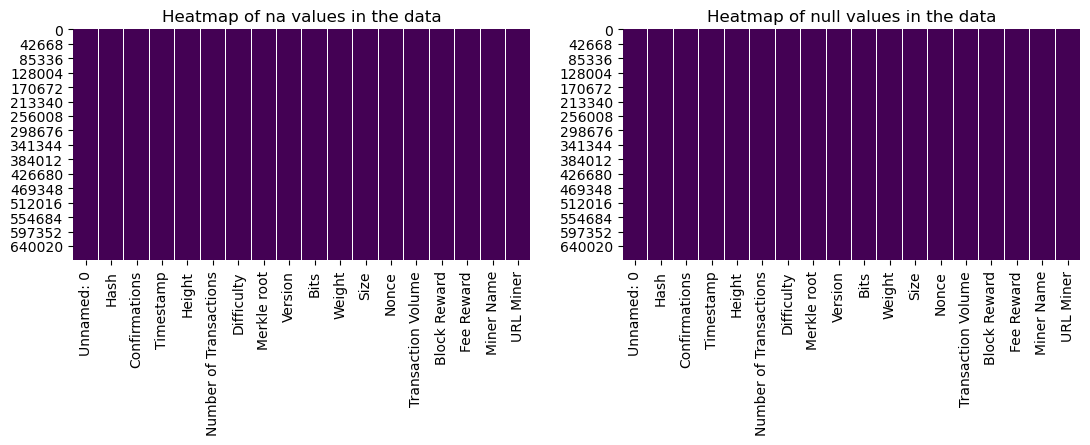

In [5]:
plt.figure(figsize = (13,3))
plt.subplot(1,2,1)
sns.heatmap(df.isna(),cmap = 'viridis', cbar = False)
plt.title('Heatmap of na values in the data')
plt.subplot(1,2,2)
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False)
plt.title('Heatmap of null values in the data')

plt.show()
plt.tight_layout()

In [21]:
print("Any na values in the dataset are as follows: ",df.isna().sum(),"\n","\n",
      "Any null values in the dataset are as follows:",df.isnull().sum())

Any na values in the dataset are as follows:  Hash                      0
Timestamp                 0
Number of Transactions    0
Size                      0
Hour                      0
Minute                    0
dtype: int64 
 
 Any null values in the dataset are as follows: Hash                      0
Timestamp                 0
Number of Transactions    0
Size                      0
Hour                      0
Minute                    0
dtype: int64


As we can see, there are no na and null values detected in the heatmap and summary table.

In [7]:
# Select relevant variables to solve the two problems.
df = df[['Hash', 'Timestamp','Number of Transactions', 'Size']]
# Extract first five rows of the dataset.
df.head(5)

,Hash,Timestamp,Number of Transactions,Size
0,00000000000000000001da49981856df74f84c46da2319...,2021-05-09 03:01,"1,945","1,523,698 bytes"
1,00000000000000000001e888b808b8f337f36e1fa28e2c...,2021-05-09 02:40,"2,010","1,281,744 bytes"
2,0000000000000000000b056f6fc7d074eed8a3b11a21db...,2021-05-09 02:19,112,"1,042,718 bytes"
3,000000000000000000092b15e61d2d8de335b77e1575c9...,2021-05-09 02:19,112,"1,060,403 bytes"
4,000000000000000000034261ef486c4fb78e4e967c9874...,2021-05-09 02:18,398,"1,115,599 bytes"


In [8]:
# Change the timestamp variable's type.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
# Determine the dimension of the df dataframe.
df.shape

(682676, 4)

In [10]:
# In order to access the timestamp. Convert the timestamp to string from time format.
df['Timestamp'].dt.strftime("%m/%d/%y %H:%M:%S")

0         05/09/21 03:01:00
1         05/09/21 02:40:00
2         05/09/21 02:19:00
3         05/09/21 02:19:00
4         05/09/21 02:18:00
                ...        
682671    01/09/09 03:23:00
682672    01/09/09 03:16:00
682673    01/09/09 03:02:00
682674    01/09/09 02:55:00
682675    01/09/09 02:54:00
Name: Timestamp, Length: 682676, dtype: object

In [22]:
# Access hour component from the timestamp.
df['Hour'] = [x.hour for x in df['Timestamp']]

# Access minute component from the timestamp.
df['Minute'] = [x.minute for x in df['Timestamp']]

In [12]:
# Filter the data to the blocks mined more than 2 hours apart from each other. Create a new dataframe called df1.
df1 = df[df['Hour'] > 2]
# Extract first five rows.
df1.head(10)

,Hash,Timestamp,Number of Transactions,Size,Hour,Minute
0,00000000000000000001da49981856df74f84c46da2319...,2021-05-09 03:01:00,"1,945","1,523,698 bytes",3,1
29,00000000000000000007669ba1695086e40d7e14239681...,2021-05-08 23:49:00,"1,699","1,734,505 bytes",23,49
30,00000000000000000005dcb4040a2480b8ede7864e2abc...,2021-05-08 23:39:00,"1,185","1,831,521 bytes",23,39
31,0000000000000000000b4ea172200b00990e6be37bd373...,2021-05-08 23:38:00,"2,641","1,327,530 bytes",23,38
32,0000000000000000000da50d3a51bbfe40ffeb92978be2...,2021-05-08 23:14:00,321,"2,208,473 bytes",23,14
33,000000000000000000077f15562f5f49f2767893152817...,2021-05-08 23:12:00,"2,060","1,473,035 bytes",23,12
34,0000000000000000000b8a1624f0d6d7ab0c3111a0deae...,2021-05-08 23:05:00,"2,271","1,330,344 bytes",23,5
35,0000000000000000000cd45cebced9c1d1f349ef80df19...,2021-05-08 22:47:00,"1,046","1,937,417 bytes",22,47
36,0000000000000000000c769b66e73ba4476c381b34d27c...,2021-05-08 22:42:00,"1,412","1,615,440 bytes",22,42
37,00000000000000000002ec807f416ae685249ac16dd46f...,2021-05-08 22:35:00,"1,569","1,203,127 bytes",22,35


# How often does the Bitcoin network see two consecutive blocks mined more than 2 hours apart from each other? 

In order to answer the above question, I created a new variable called 'Time_Diff' which signifies the difference among consecutive blocks mined.

In [13]:
# # Create a formula which computes the time difference among consecutive blocks mined.
df1['Time_Diff'] = df1['Timestamp']-df1['Timestamp'].shift(-1)

In [14]:
# Use a replace() function to replace the comma from the number of transactions variable.
df1['Number of Transactions'] = df1['Number of Transactions'].str.replace(",","")

# Use a replace() function to replace the comma from the size variable.
df1['Size'] = df1['Size'].str.replace(",","")
df1['Size'] = df1['Size'].str.replace("bytes","")

# Extract the desired variables to demonstrate the difference among consecutive blocks mined.
df1[['Hash','Size', 'Time_Diff']].head(10)

,Hash,Size,Time_Diff
0,00000000000000000001da49981856df74f84c46da2319...,1523698,0 days 03:12:00
29,00000000000000000007669ba1695086e40d7e14239681...,1734505,0 days 00:10:00
30,00000000000000000005dcb4040a2480b8ede7864e2abc...,1831521,0 days 00:01:00
31,0000000000000000000b4ea172200b00990e6be37bd373...,1327530,0 days 00:24:00
32,0000000000000000000da50d3a51bbfe40ffeb92978be2...,2208473,0 days 00:02:00
33,000000000000000000077f15562f5f49f2767893152817...,1473035,0 days 00:07:00
34,0000000000000000000b8a1624f0d6d7ab0c3111a0deae...,1330344,0 days 00:18:00
35,0000000000000000000cd45cebced9c1d1f349ef80df19...,1937417,0 days 00:05:00
36,0000000000000000000c769b66e73ba4476c381b34d27c...,1615440,0 days 00:07:00
37,00000000000000000002ec807f416ae685249ac16dd46f...,1203127,0 days 00:03:00


After investigting the dataframe, I obtained the time difference among each consecutive blocks mined. The variable 'Time_Diff' indicates the total time taken for the consecutive blocks mined since 2009.

# Exploratory Data Analysis (EDA)

<Figure size 640x480 with 0 Axes>

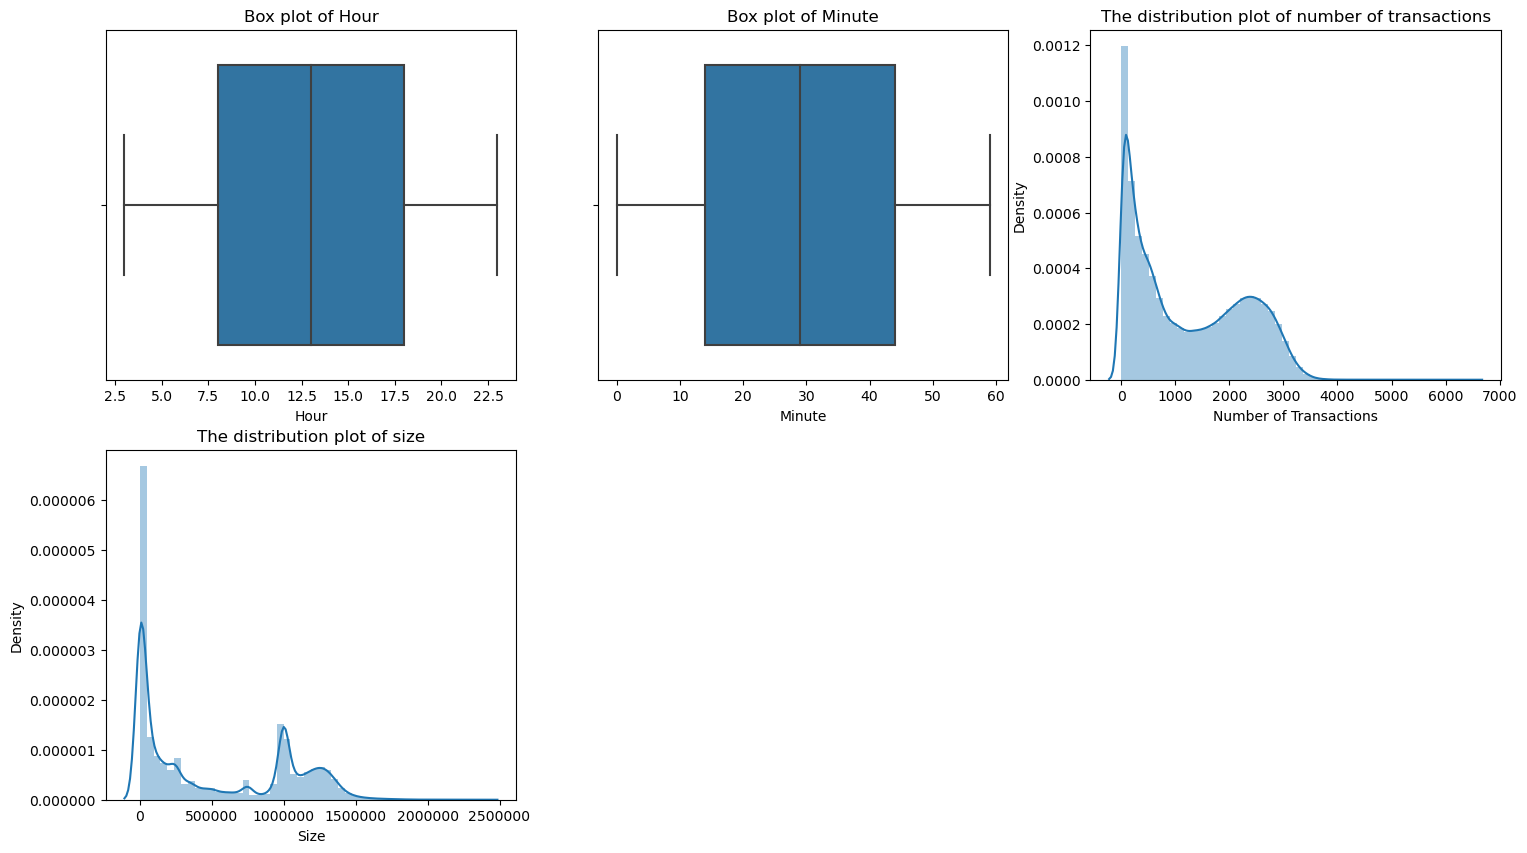

In [37]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (18,10))

plt.subplot(2,3,1)
sns.boxplot(x = 'Hour', data = df1)
plt.title("Box plot of Hour")

plt.subplot(2,3,2)
sns.boxplot(x = 'Minute', data = df1)
plt.title("Box plot of Minute")


plt.subplot(2,3,3)
sns.distplot(df1['Number of Transactions'])
plt.title("The distribution plot of number of transactions")

plt.subplot(2,3,4)
sns.distplot(df1['Size'] )
plt.title("The distribution plot of size")
plt.ticklabel_format(axis='both', style='plain', scilimits=None, 
                     useOffset=None, 
                     useLocale=None, useMathText=None)

# Show the plots.
plt.show()
plt.tight_layout() 

The above data visualizatons are based on the filtered data. The data visualization plots indicate the median and distributions along with density smooth curves. The box plot indicates that the median hour blocks mined was 13 hours and the median minutes was 29 minutes. The boxplot didn't show any extreme outliers in the dataset. In the number of transactions per block, the data is highly concetrated around the 100 to 3000 transactions. The size of each block varied since 2009, the distribution of the size indicates the data is concentrated around 1-150 million bytes.

# How many times has the above happened so far in the history of Bitcoin?

In [35]:
print("The total number of times it has happened so far in the history of Bitcoin was",df1['Hash'].nunique(),"times.")

The total number of times it has happened so far in the history of Bitcoin was 597823 times.
